<a href="https://colab.research.google.com/github/psGitOrange/Yulu-Bike-Sharing-Statistical-Report/blob/main/Yulu_Hyp_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing on Yulu - Bike Sharing Service

### **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

<img src="https://yulu-blogs-cdn.yulu.bike/large_Whats_App_Image_2023_10_30_at_16_14_34_03ea1f9a_3640299873.jpg" alt="walmart_img" width="720"/>

## Business Problem Statement:
The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

**Concepts Used:**

- Bi-Variate Analysis
- 2-sample t-test: testing for difference across populations
- ANNOVA
- Chi-square

### Dataset:</br>
Dataset Link: [yulu_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

**Column Profiling:**

- datetime: datetime </br>
- season: season (1: spring, 2: summer, 3: fall, 4: winter) </br>
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) </br>
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.</br>
- weather: </br>
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</br>
- temp: temperature in Celsius</br>
- atemp: feeling temperature in Celsius</br>
- humidity: humidity</br>
- windspeed: wind speed</br>
- casual: count of casual users</br>
- registered: count of registered users</br>
- count: count of total rental bikes including both casual and registered

## Exploratory Data Analysis

In [ ]:
# Data Handling Library
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# System
import os

# Scientific Calculation Library
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway  # num vs multi cat
from scipy.stats import ttest_ind  # num vs cat
from statsmodels.graphics.gofplots import qqplot  # normality plot

from scipy.stats import chi2_contingency

In [ ]:
!pip install ydata-profiling  # preliminary data report
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b2585ab58fd3a2647ff7156053d9f89c9b8c4c9e8c47b2671df31b9b4780be33
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# load yulu bike sharing data csv file
raw_df = pd.read_csv('yulu_bike_sharing.csv')
raw_df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [ ]:
print(f'Shape of dataframe (rows,cols): {raw_df.shape}')

Shape of dataframe (rows,cols): (10886, 12)


In [ ]:
raw_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

The data frame has **10,886** rows and **12** columns.

The columns are `datetime`, `season`, `holiday`, `workday`, `weather`, `temp`, `atemp`, `humidity`, `windspeed`, `casual`, `registered`, and `count`. We have seen the description of these variables above.


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


The `info` function gives us additional information about the non-null count of each column, the data type, and the memory usage of the data frame.

We only have one object column, which should be a `datetime` column. We will convert this to extract days, months, and other components if required for time series analysis.



In [ ]:
# check null value count
raw_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

The `isnull` function is used to check if there are any null values present in our data set.

`Season`, `holiday`, `workingday`, and `weather` are stored as integer values; we will convert them to the categorical type using the `as_type('category')` function.

Converting the `date time` column to `datetime` type using the `to_datetime` function.


In [ ]:
# converting categories from int to categorical type
int_to_cat_cols = ['season', 'holiday', 'workingday', 'weather']
for col in int_to_cat_cols:
  raw_df[col] = raw_df[col].astype("category")

In [ ]:
# convert datetime columnn to datetime type
raw_df['datetime'] = pd.to_datetime(raw_df['datetime'], format="ISO8601")

In [ ]:
raw_df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
raw_df.describe(include=[int, float]).round(2)

temp     atemp  humidity  windspeed    casual  registered     count
count  10886.00  10886.00  10886.00   10886.00  10886.00    10886.00  10886.00
mean      20.23     23.66     61.89      12.80     36.02      155.55    191.57
std        7.79      8.47     19.25       8.16     49.96      151.04    181.14
min        0.82      0.76      0.00       0.00      0.00        0.00      1.00
25%       13.94     16.66     47.00       7.00      4.00       36.00     42.00
50%       20.50     24.24     62.00      13.00     17.00      118.00    145.00
75%       26.24     31.06     77.00      17.00     49.00      222.00    284.00
max       41.00     45.46    100.00      57.00    367.00      886.00    977.00

Describe function shows the **min, max, 25,  50, 75 percentile and the count, mean, standard deviations** of each integral variable

> Below are the important **statistical characteristics** of each variable.



In [ ]:
raw_df.describe(include=[int, float]).loc[['min', 'max', 'mean', '50%', 'std']].round(2).T

min     max    mean     50%     std
temp        0.82   41.00   20.23   20.50    7.79
atemp       0.76   45.46   23.66   24.24    8.47
humidity    0.00  100.00   61.89   62.00   19.25
windspeed   0.00   57.00   12.80   13.00    8.16
casual      0.00  367.00   36.02   17.00   49.96
registered  0.00  886.00  155.55  118.00  151.04
count       1.00  977.00  191.57  145.00  181.14

We can see that `casual`, `registered`, and `count` are right-skewed, as their mean is greater than the median.

- **`casual`** (the number of casual or unregistered users)
- **`registered`** (the count of registered users)
- **`count`** (the number of bikes shared)

Naturally, the `count` variable is correlated with `casual` and `registered` users. It follows the same trend as the other two variables.


### Univariate Analysis

We are going to plot the distribution of age variables, specifically using a histogram and a line plot.

- **Histogram**: Helps to see the distribution of values for each variable.
- **Line plot**: Helps in viewing the trend of each variable.

In [ ]:
sns.set_style('darkgrid')  # set plot style

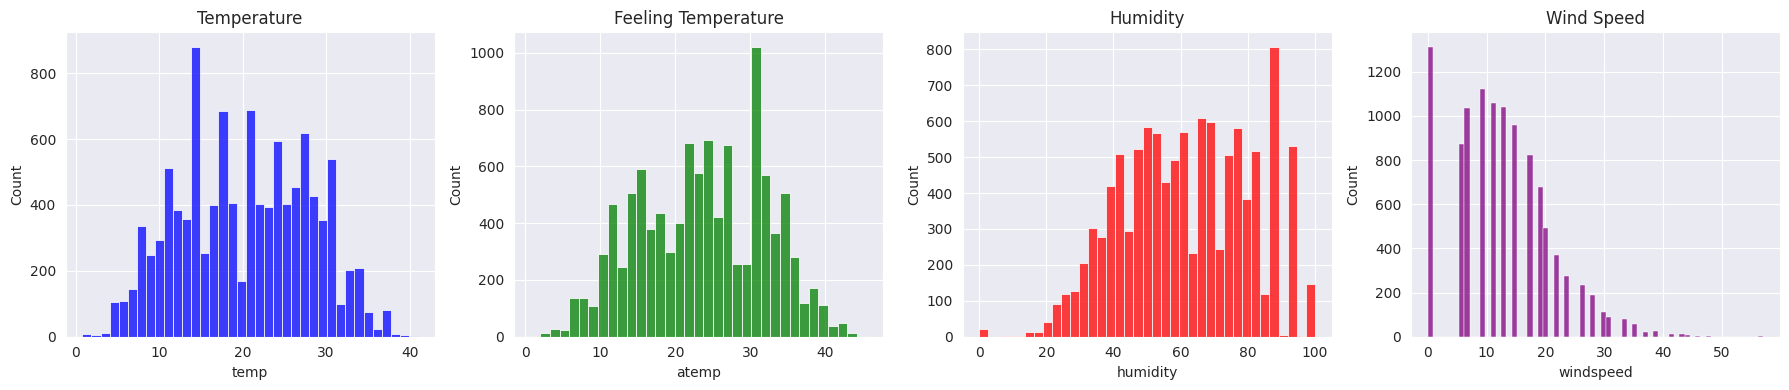

In [ ]:
# setup 4 subplots (1 row, 4 cols)
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Plot histograms
sns.histplot(raw_df['temp'], ax=axes[0], color='blue')
axes[0].set_title('Temperature')

sns.histplot(raw_df['atemp'], ax=axes[1], color='green')
axes[1].set_title('Feeling Temperature')

sns.histplot(raw_df['humidity'], ax=axes[2], color='red')
axes[2].set_title('Humidity')

sns.histplot(raw_df['windspeed'], ax=axes[3], color='purple')
axes[3].set_title('Wind Speed')

plt.tight_layout()
plt.show()

**Histograms**

- **Temperature**: Values range from 0 to 41°C, with a normal distribution and a mean of 20°C.
- **atemp** (feeling temperature): Similar distribution to temperature, with a mean of 24°C.
- **Humidity**: Ranges from 0 to 100, with a high standard deviation of 19.25 and slightly left-skewed data, with a mean of 61.89.
- **Wind speed**: Ranges from 0 to 57, and is left-skewed.


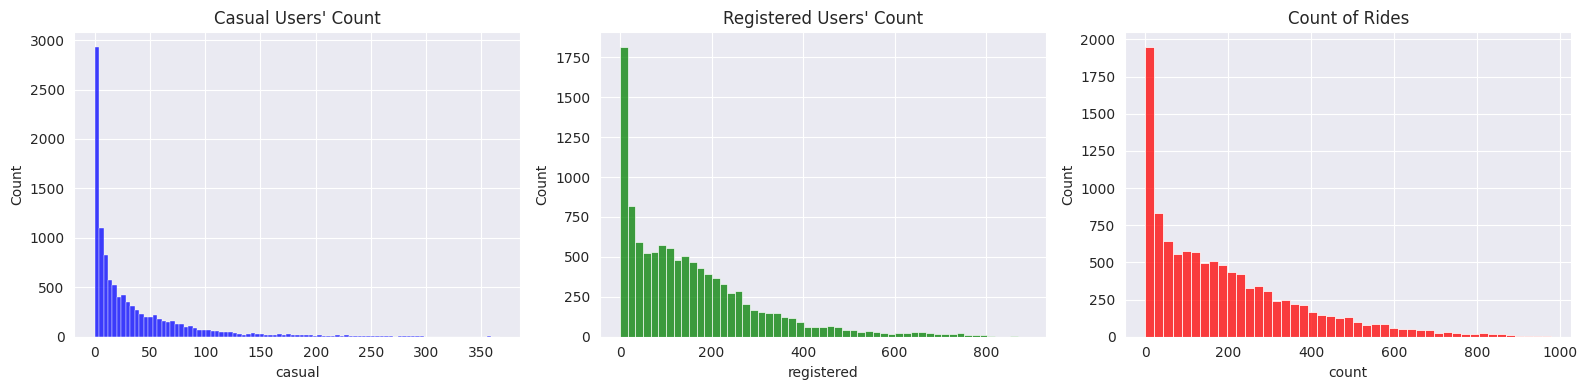

In [ ]:
# setup 3 subplots (1 row, 3 cols)
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot histograms
sns.histplot(raw_df['casual'], ax=axes[0], color='blue')
axes[0].set_title("Casual Users' Count")

sns.histplot(raw_df['registered'], ax=axes[1], color='green')
axes[1].set_title("Registered Users' Count")

sns.histplot(raw_df['count'], ax=axes[2], color='red')
axes[2].set_title('Count of Rides')

plt.tight_layout()
plt.show()

**Casual users**, **registered users**, and the **count of bikes shared** are all highly left-skewed.

- **Casual users**: Ranges from 0 to 367, with a median of 17 and a standard deviation of 49.
- **Registered users**: Ranges from 0 to 886, with a median of 118 and a standard deviation of 151.
- **Count of bikes shared**: Ranges from 1 to 977, with a median of 145 and a standard deviation of 181.


In [ ]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
titles = ['Temperature', 'Feeling Temperature', 'Humidity', 'Wind Speed', "Casual Users' Count", "Registered Users' Count", 'Count of Rides']

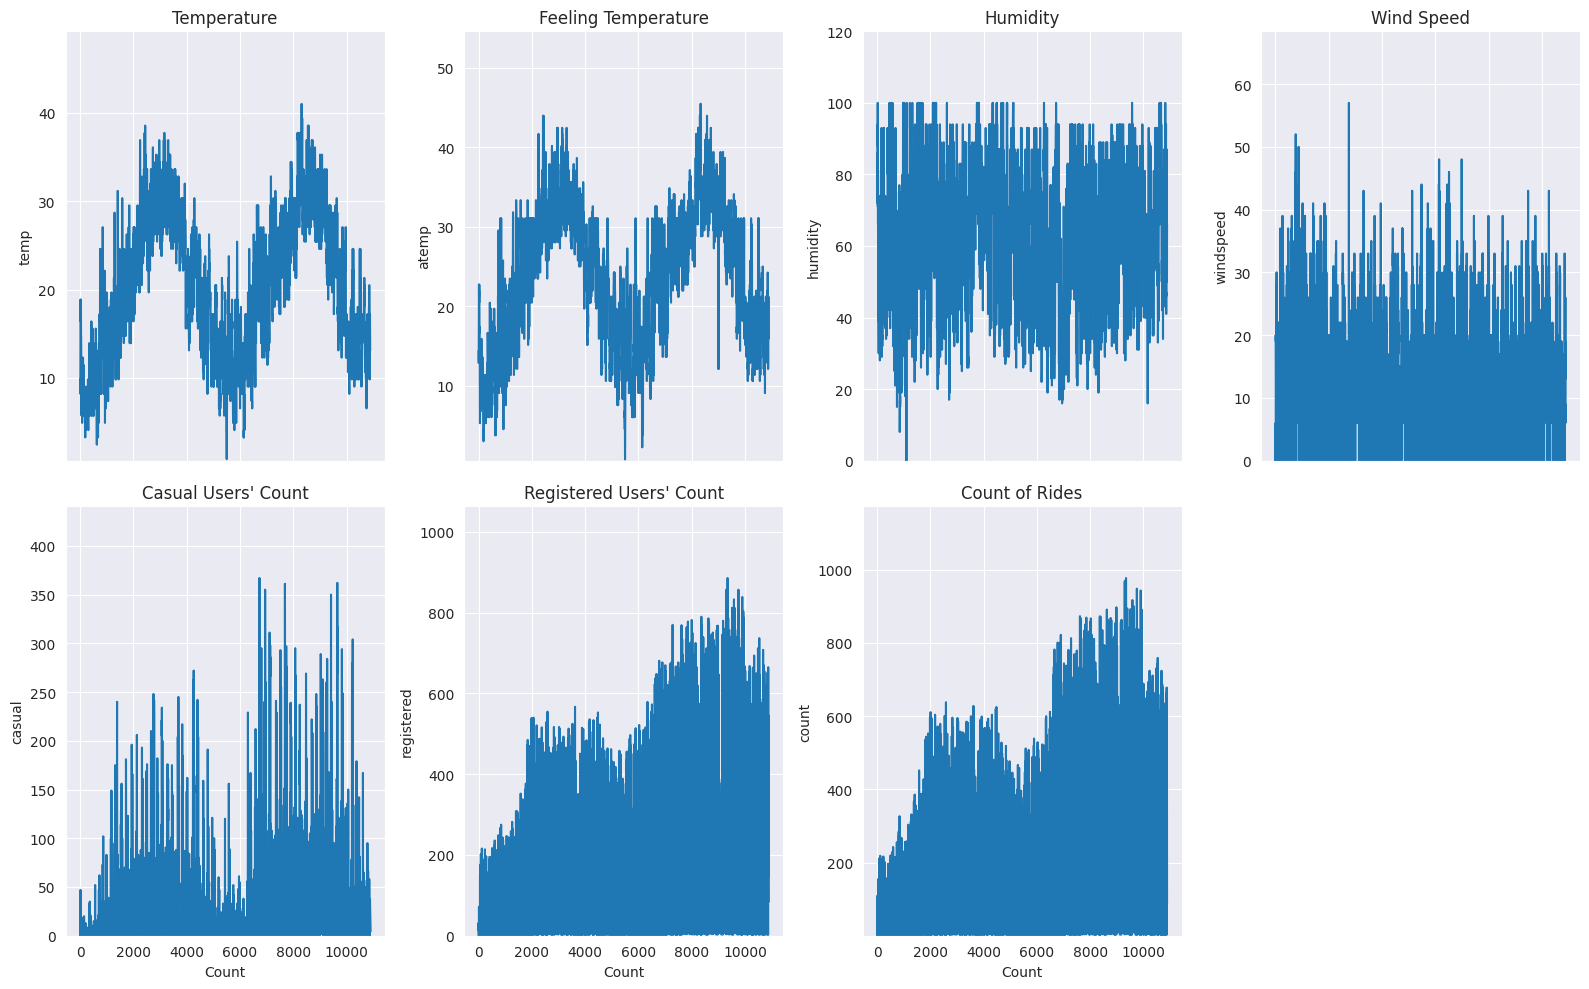

In [ ]:
# setup subplots (2 row, 4 cols)
fig, axes = plt.subplots(2, 4, figsize=(16, 10), sharex=True)

axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column
for i, (column, title) in enumerate(zip(cols,titles)):
    sns.lineplot(data=raw_df, x=raw_df.index, y=column, ax=axes[i])
    axes[i].set_title(title)

    # You can customize these limits as per your data
    y_min = raw_df[column].min()*0.8
    y_max = raw_df[column].max()*1.2
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlabel("Count")
    # axes[i].set_ylabel("Value")

# Remove any unused subplots (if any)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Line plots**

- **Temperature (`temp` and `atemp`)**: Both variables follow a cyclic variation based on **seasonal** changes.
- **Humidity**: Shows some faint peaks and crests, with **high variability**, jumping between 20 and 100.
- **Wind speed**: **Fluctuates** between 0 and 40.

- **Casual user count**: Highly volatile, with many users frequently using and stopping the bike-sharing service. Shows **periodic variation**, often syncing with dropping temperatures—suggesting that users may avoid riding in cold weather.

- **Registered user count**: Historically increases, but follows a similar trend to casual users. The number of users **decreases** during **cold** weather.

- **Count variable**: **Correlated** with both casual and registered user counts. As shown in the line plot, it follows the same trend as registered user counts.

### y data profiling

In [ ]:
ProfileReport(raw_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Correlation** matrix shows:

- **Count**:It is highly correlated to `registered`, and `casual`. With correlation value between 0.75 and 1.

- **temp & atemp**: Both are postively correlated to `count`

- **Holiday**: Not correlated with the `count` variable.

- **Humidity**: Inversely proportional to the count of bikes shared, meaning that as humidity increases, the count of bikes shared decreases.

**Alerts:** provided by y data profiling

- **`atemp`**: Highly correlated with `casual`, `season`, and `temp` - *High correlation*
- **`casual`**: Highly correlated with `atemp`, `temp`, `count`, and `registered` - *High correlation*
- **`count`**: Highly correlated with `casual` and `registered` - *High correlation*
- **`registered`**: Highly correlated with `casual` and `count` - *High correlation*
- **`season`**: Highly correlated with `atemp` and `temp` - *High correlation*
- **`temp`**: Highly correlated with `atemp`, `casual`, and `season` - *High correlation*
- **`holiday`**: Highly imbalanced (81.3%) - *Imbalance*
- **`datetime`**: Has unique values - *Unique*
- **`windspeed`**: Has 1313 zeros (12.1%) - *Zeros*
- **`casual`**: Has 986 zeros (9.1%) - *Zeros*

### Preprocessing Data

In [ ]:
# # Convert the 'datetime' column to datetime format
# raw_df['datetime'] = pd.to_datetimetime(raw_df['datetime'])

# # Extract Day, Weekday, Week number, and Month
# raw_df['day'] = raw_df['datetime'].dt.day
# raw_df['weekday'] = raw_df['datetime'].dt.day_name()   # For weekday names like Monday, Tuesday, etc.
# raw_df['week_number'] = raw_df['datetime'].dt.isocalendar().week  # For ISO week number
# raw_df['month'] = raw_df['datetime'].dt.month

# # Display the DataFrame with the new columns
# print(raw_df)

# Extract the hour value
raw_df['hour'] = raw_df['datetime'].dt.hour

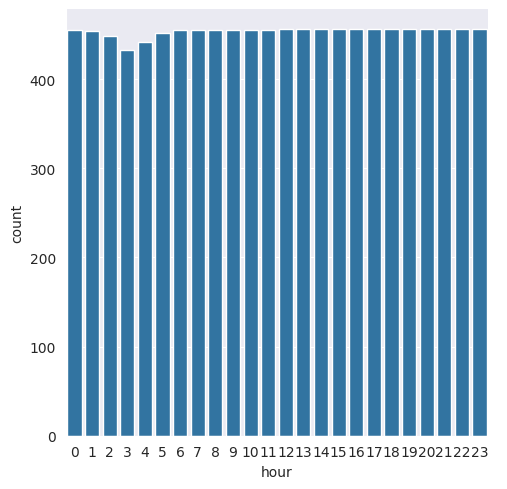

In [ ]:
# count plot
sns.catplot(raw_df, x='hour', kind='count')  # all hour data for each day is collected except few related to mid night
plt.show()

**Yulu** has collected hourly data for each day, except for a few hours around midnight.

There are many low ride values. To address this, lets see at what hour they occur, so maybe we can remove the non working hr from our analysis.

`Groupby` data based on **hours** column, then sort them in **descending** order of their count. We will also get the **cumulative sum** for the count variable.

In [ ]:
hour_df = raw_df.groupby(by='hour', sort=True)[['count']].agg(['min', 'max', 'mean', 'median'])
hour_df

count                        
       min  max        mean median
hour                              
0        2  283   55.138462   41.0
1        1  168   33.859031   19.0
2        1  119   22.899554   11.0
3        1   66   11.757506    6.0
4        1   28    6.407240    6.0
5        1   57   19.767699   19.0
6        1  213   76.259341   75.0
7        1  596  213.116484  208.0
8        8  839  362.769231  392.0
9       14  414  221.780220  217.0
10      17  539  175.092308  149.0
11      10  647  210.674725  183.0
12       3  757  256.508772  234.5
13      11  729  257.787281  226.5
14      12  730  243.442982  212.0
15       7  724  254.298246  232.0
16      11  783  316.372807  309.5
17      15  970  468.765351  480.5
18      23  977  430.859649  422.5
19      11  743  315.278509  312.5
20      11  551  228.517544  224.0
21       6  584  173.370614  171.5
22       9  502  133.576754  129.0
23       4  256   89.508772   80.0

In [ ]:
# Sort hour_df by the 'count', 'median' column in descending order
sorted_hour_df = hour_df.sort_values(by=('count', 'median'), ascending=False)

# Calculate the cumulative sum percentage of the median values
sorted_hour_df['cumulative'] = 100 * (sorted_hour_df[('count', 'median')].cumsum() / sorted_hour_df[('count', 'median')].sum())

sorted_hour_df.reset_index(inplace=True)  # reset index
sorted_hour_df

hour count                          cumulative
          min  max        mean median            
0    17    15  970  468.765351  480.5   11.019379
1    18    23  977  430.859649  422.5   20.708634
2     8     8  839  362.769231  392.0   29.698429
3    19    11  743  315.278509  312.5   36.865038
4    16    11  783  316.372807  309.5   43.962848
5    12     3  757  256.508772  234.5   49.340672
6    15     7  724  254.298246  232.0   54.661163
7    13    11  729  257.787281  226.5   59.855521
8    20    11  551  228.517544  224.0   64.992547
9     9    14  414  221.780220  217.0   69.969040
10   14    12  730  243.442982  212.0   74.830868
11    7     1  596  213.116484  208.0   79.600963
12   11    10  647  210.674725  183.0   83.797730
13   21     6  584  173.370614  171.5   87.730765
14   10    17  539  175.092308  149.0   91.147804
15   22     9  502  133.576754  129.0   94.106180
16   23     4  256   89.508772   80.0   95.940832
17    6     1  213   76.259341   75.0   97.660819
18    0     2  283   55.138462   41.0   98.601078
19    1     1  168   33.859031   19.0   99.036808
20    5     1   57   19.767699   19.0   99.472538
21    2     1  119   22.899554   11.0   99.724802
22    4     1   28    6.407240    6.0   99.862401
23    3     1   66   11.757506    6.0  100.000000

**Create a Pareto diagram** for the number of bike shares for each hour.
   - Sort the hours based on median values and calculate the cumulative sum.
   - Use this to determine how much of the data lies within the top 80%, 90%, or 95%.

**Generate two plots**:
   - **Histogram** of bike shares by hour.
   - **Line plot** of the cumulative sum of values on the same x-axis.

In [ ]:
# Testing the bike share count bar plot
# sns.barplot(sorted_hour_df, x='hour', y=('count', 'median'), order=sorted_hour_df.hour.to_list())  #
# plt.show()

In [ ]:
# converting the x axis variable to str
# as integer values get inherently sorted in ascending order while plotting
x=sorted_hour_df.hour.to_list()
x = list(map(str, x))
print(type(x))
print(x)

# rounding cumulative sum to 2 decimals
y=sorted_hour_df.cumulative.round(2).to_list()
print(type(y))
print(y)

# Testing the cumulative sum line plot
# Create the line plot using Matplotlib
# sns.lineplot(x=x, y=y, marker='s', color='red', label='Cumulative Sum')
# plt.legend()
# plt.show()

<class 'list'>
['17', '18', '8', '19', '16', '12', '15', '13', '20', '9', '14', '7', '11', '21', '10', '22', '23', '6', '0', '1', '5', '2', '4', '3']
<class 'list'>
[11.02, 20.71, 29.7, 36.87, 43.96, 49.34, 54.66, 59.86, 64.99, 69.97, 74.83, 79.6, 83.8, 87.73, 91.15, 94.11, 95.94, 97.66, 98.6, 99.04, 99.47, 99.72, 99.86, 100.0]


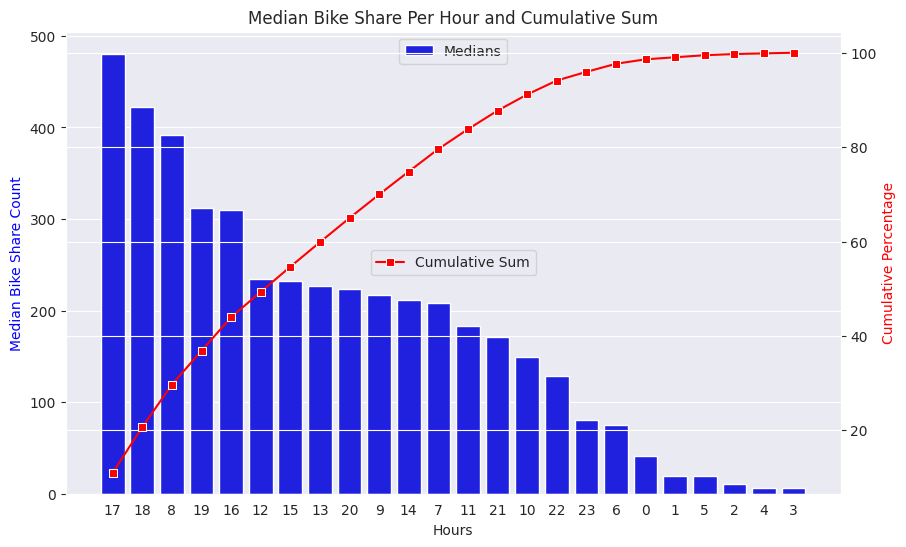

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), sharex=True)

# First plot the histogram
sns.barplot(sorted_hour_df, x='hour', y=('count', 'median'),
            order=sorted_hour_df.hour.to_list(),
            color='blue', label='Medians', ax=ax)

# Create a second y-axis
ax2 = ax.twinx()  # create a second y-axis that shares the same x-axis

# Second plot the line plot on the same axis
sns.lineplot(x=x, y=y, marker='s', color='red',
             label='Cumulative Sum', ax=ax2)

plt.title('Median Bike Share Per Hour and Cumulative Sum')

# Add labels and legends
ax.set_xlabel('Hours')
ax.set_ylabel('Median Bike Share Count', color='blue')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax.legend(loc='upper center')
ax2.legend(loc='center')

plt.show()

From the sorted table and the graph, we can observe that:
- 80% of the values come from the top 10 working hours.
- 95% of the data does not include midnight hours.

Likewise 80/20 rule, we will use 95/5 rule. we will **remove** the least 5% of the value/hours working, data between **midnight 12 AM and 6 AM**, as bike sharing is expected to be minimal during these hours. Naturally, everyone is sleeping, except very few eccentric people.

This will help reduce the skew of the data and provide a better distribution for further analysis.

In [ ]:
raw_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Filter out rows where 'hours' is between 0 and 6
yulu_df = raw_df[~raw_df['hour'].between(0, 6)].reset_index(drop=True)
yulu_df

datetime season holiday workingday weather   temp   atemp  \
0    2011-01-01 07:00:00      1       0          0       1   8.20  12.880   
1    2011-01-01 08:00:00      1       0          0       1   9.84  14.395   
2    2011-01-01 09:00:00      1       0          0       1  13.12  17.425   
3    2011-01-01 10:00:00      1       0          0       1  15.58  19.695   
4    2011-01-01 11:00:00      1       0          0       1  14.76  16.665   
...                  ...    ...     ...        ...     ...    ...     ...   
7742 2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
7743 2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
7744 2012-12-19 21:00:00      4       0          1       1  13.94  15.910   
7745 2012-12-19 22:00:00      4       0          1       1  13.94  17.425   
7746 2012-12-19 23:00:00      4       0          1       1  13.12  16.665   

      humidity  windspeed  casual  registered  count  hour  
0           86     0.0000       1           2      3     7  
1           75     0.0000       1           7      8     8  
2           76     0.0000       8           6     14     9  
3           76    16.9979      12          24     36    10  
4           81    19.0012      26          30     56    11  
...        ...        ...     ...         ...    ...   ...  
7742        50    26.0027       7         329    336    19  
7743        57    15.0013      10         231    241    20  
7744        61    15.0013       4         164    168    21  
7745        61     6.0032      12         117    129    22  
7746        66     8.9981       4          84     88    23  

[7747 rows x 13 columns]

## Q) Is Working day correlated to Count of Yulu Bike shared?  

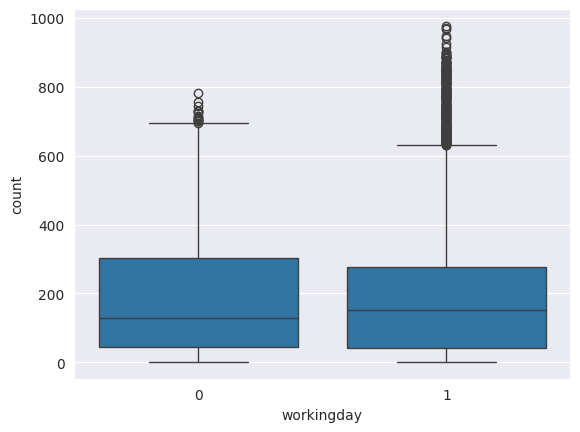

In [ ]:
sns.boxplot(raw_df, x='workingday', y='count')
plt.show()

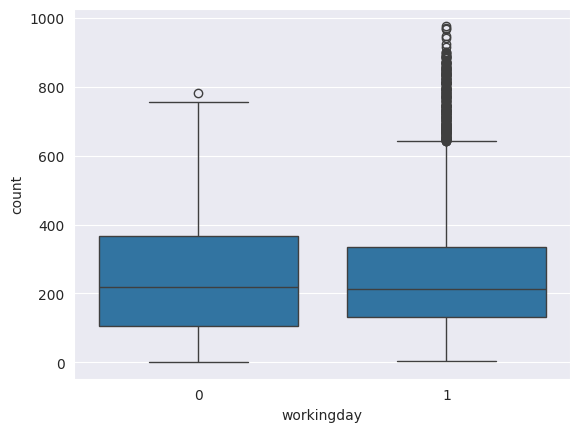

In [ ]:
sns.boxplot(yulu_df, x='workingday', y='count')  # median has increased
plt.show()

**Median** is increased to more than **200** counts per hour on both working and weekend days, after removal of counts from the non working hours.

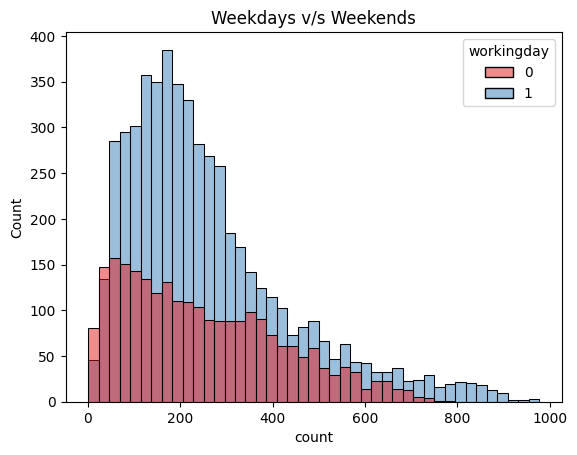

In [ ]:
sns.histplot(data=yulu_df, x='count', hue='workingday', palette='Set1')
plt.title("Weekdays v/s Weekends")
plt.show()

In [ ]:
# Filter dataset based on Working Day
weekdays = yulu_df[yulu_df['workingday'] == 1]['count']
weekends = yulu_df[yulu_df['workingday'] == 0]['count']
weekends

0         3
1         8
2        14
3        36
4        56
       ... 
7691    109
7692    122
7693    106
7694     89
7695     33
Name: count, Length: 2465, dtype: int64

In [ ]:
# sample size for test should be small
# Get a random sample of the specified size
sample_indices = np.random.choice(weekdays.index, size=2500, replace=False)
weekdays_s1 = weekdays.loc[sample_indices]

Check the distribution of samples, it should be similar to above original distribution.

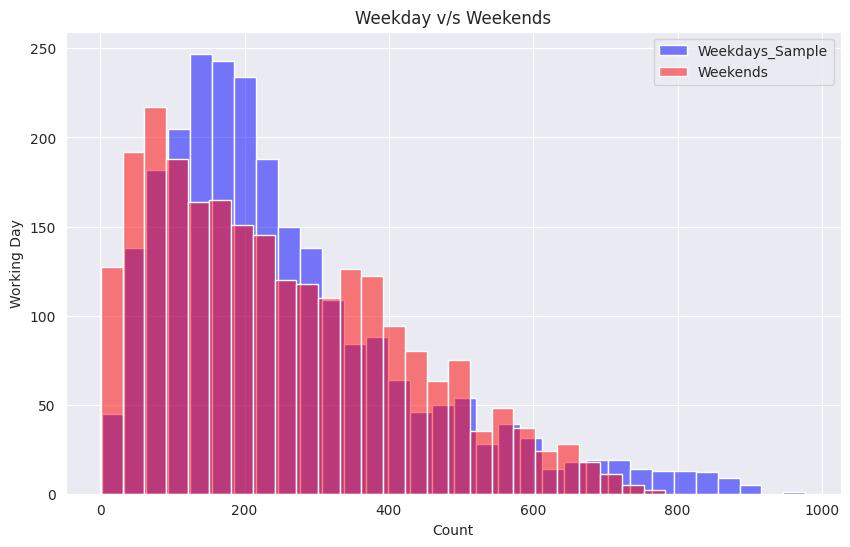

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), sharey=True)

# Plot the first histogram
sns.histplot(weekdays_s1, kde=False, color='blue', alpha=0.5,
             label='Weekdays_Sample', binwidth=30, ax=ax)

# Plot the second histogram on the same axis
sns.histplot(weekends, kde=False, color='red', alpha=0.5,
             label='Weekends', binwidth=30, ax=ax)

# Add labels and a legend
ax.set_xlabel('Count')
ax.set_ylabel('Working Days')
ax.set_title('Weekday v/s Weekends')
ax.legend()

# Show the plot
plt.show()

### Assumptions of 2 Sample T-test:
1. Data values must be **independent**.
2. Data in each group must be obtained via a **random** sample from the population.
3. Data in each group are **normally distributed.**
4. Data values are **continuous**.
5. The **variances** for the two independent groups are equal.

Assuming the data values obtained are independent of each other and that the data sample was obtained through random sampling, we observe that the data values are continuous.

Next, we will check for the normality of the data and whether the variances of two independent groups are equal.


In [ ]:
# Check normality
# H0: Dataset sample follows normal distribution
# Ha: Dataset sample does not follows normal distribution

print(shapiro(weekdays_s1))
print(shapiro(weekends))

ShapiroResult(statistic=0.8938348759069322, pvalue=1.7520028656746832e-38)
ShapiroResult(statistic=0.945065226170989, pvalue=2.2445572935417622e-29)


Shapiro-Wilk test to assess the normality of a dataset:
We can see both the variables have, very low p_value, extremely small. Less than the significance level of 0.05.

We **reject** the **null hypothesis**.This suggests that the data in `weekdays_s1`, `weekends` does **not** follow a **normal distribution**. This is seen is histogram and descriptive stats above as well.

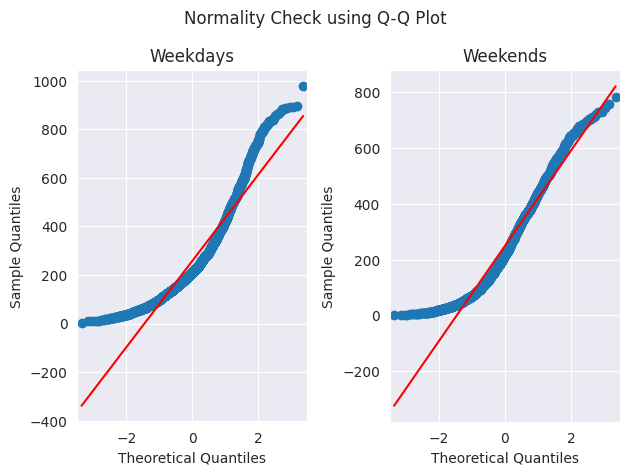

In [ ]:
# checking normal distribution
fig, (ax1, ax2) = plt.subplots(1, 2)

qqplot(weekdays_s1.to_frame()['count'], line="s", ax=ax1)
qqplot(weekends.to_frame()['count'], line="s", ax=ax2)

plt.suptitle('Normality Check using Q-Q Plot')
ax1.set_title("Weekdays")
ax2.set_title("Weekends")

plt.tight_layout()
plt.show()

The **QQ plot** shows that our data is not normally distributed.

- It significantly deviates from the normal distribution, especially in the weekdays data, where there are outliers at the tail.

- Both weekdays and weekends have heavier tails on the left side.

as wel can see in hist, and confirm from stats, not gaussian

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal

levene_stat, p_value = levene(weekdays, weekends)
p_value

0.0013312704361926803

**Null Hypothesis (H₀)**: The variances of the two groups (weekdays and weekends) are equal.
**Alternative Hypothesis (H₁)**: The variances of the two groups are not equal.
**Significance Level (α)**: 0.05

**Test Result:**
- **p-value**: 0.0013

Since the p-value (0.0013) is much smaller than the significance level of 0.05, we reject the null hypothesis. This indicates that the variances of the weekdays and weekends groups are significantly different from each other.


### 2 Sample t-test

**Null Hypothesis (H0):** Bike share mean of Weekdays is equal to Weekends
$$ H_0: \mu_{weekdays} = \mu_{weekends} $$
The null hypothesis states that there is no significant difference between the mean number of bike shares per hour on weekdays and weekends

**Alternative Hypothesis (H1):** Bike share mean of Weekdays is not equal to Weekends
$$
H_1: \mu_{weekdays} \neq \mu_{weekends} $$
The alternative hypothesis states that there is a significant difference between the mean number of bike shares per hour on weekdays and weekends.

Consider the significance level $\alpha = 0.05$.


For 2 Sample t-test, we will randomly select samples using  numpy's `random.choice` function. As data is not normally distributed, it may happen that the data for the two variables is samples from the opposite ends.

E.g. Weekdays values between 0-400 and Weekends values between 400-800. This will clearly indicate the means are different, rejecting the null hypothesis.

Therefore instead of small sample size of 30, here we have considered 300.

We use the `ttest_ind` function from scipy stats module for this test. We just have to pass the variables weekdays and weekends with the randomly sample bike share count.

 Also we will perform this activity 10 times. To get a average of the result, and make sure the result are not by chance.

In [ ]:
# 10 repetitions
for i in range(1, 11):
    # Randomly sample 300 elements from weekdays and weekends
    weekdays_s2 = np.random.choice(weekdays.to_list(), 300, replace=False)
    weekends_s2 = np.random.choice(weekends.to_list(), 300, replace=False)

    # Perform the t-test
    t_stat, pvalue = ttest_ind(weekdays_s2, weekends_s2, alternative='two-sided')

    # Print the results in a fancy and concise format
    print(f"Iteration {i}: T-statistic = {t_stat:.4f}, P-value = {pvalue:.4f}")

Iteration 1: T-statistic = 0.5339, P-value = 0.5936
Iteration 2: T-statistic = 1.7575, P-value = 0.0793
Iteration 3: T-statistic = 1.5717, P-value = 0.1166
Iteration 4: T-statistic = 0.2673, P-value = 0.7893
Iteration 5: T-statistic = 1.6981, P-value = 0.0900
Iteration 6: T-statistic = -0.5645, P-value = 0.5726
Iteration 7: T-statistic = 0.6919, P-value = 0.4893
Iteration 8: T-statistic = 2.3007, P-value = 0.0218
Iteration 9: T-statistic = 0.8115, P-value = 0.4174
Iteration 10: T-statistic = -0.7717, P-value = 0.4406


### Conclusion of T-test on Working day

Only 2 out of 10 test has p value less than 0.05. But this can be a random chance.

**Failing to Reject the Null Hypothesis:** In most of the iterations (8 out of 10) the p-value is above the significance level of 0.05, so we fail to reject the null hypothesis in these cases.

The Weekdays and Weekend variables don't have significant difference in their mean of count of bike shared per day per hour

This suggests that the **mean** number of Yulu bike shares per hour is **statistically similar** on both **weekdays** and **weekends**. This implies that the demand for Yulu bikes remains consistent regardless of whether it's a working day or a weekend.

Yulu should maintain a consistent level of bike availability, maintenance, and staffing across the entire week.

### Log Transformed Data

In [ ]:
# Log transformation
log_weekdays = np.log(weekdays)
log_weekends = np.log(weekends)

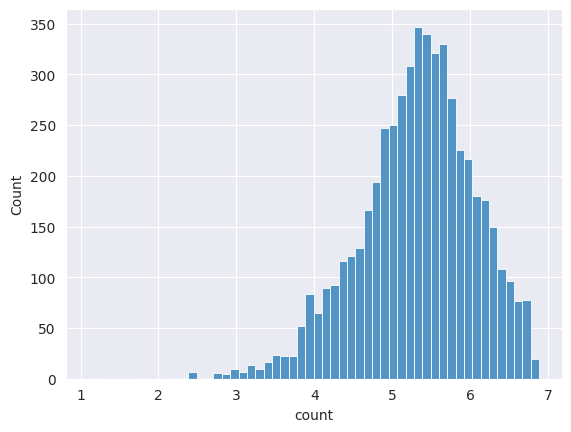

In [ ]:
sns.histplot(x=log_weekdays)
plt.show()

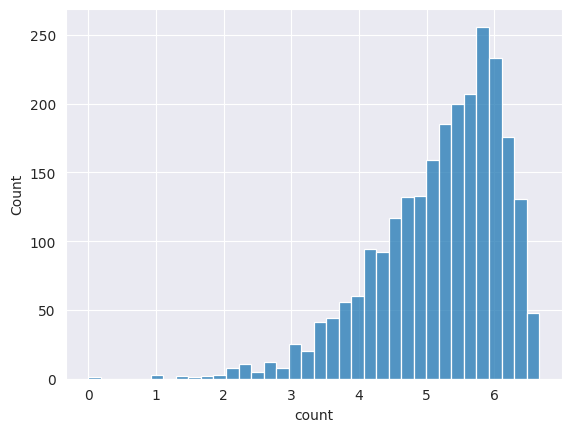

In [ ]:
sns.histplot(x=log_weekends)
plt.show()

In [ ]:
# Check normality
# H0: Dataset sample follows normal distribution
# Ha: Dataset sample does not follows normal distribution

print(shapiro(log_weekdays))
print(shapiro(log_weekends))

ShapiroResult(statistic=0.9812479628435945, pvalue=7.13329886090745e-26)
ShapiroResult(statistic=0.9326318378240801, pvalue=5.378376379921046e-32)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5282.
  res = hypotest_fun_out(*samples, **kwds)


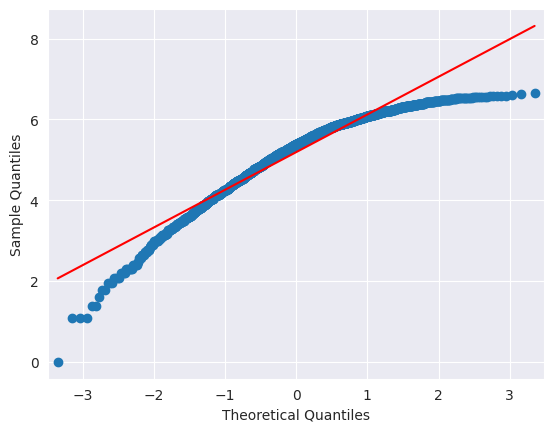

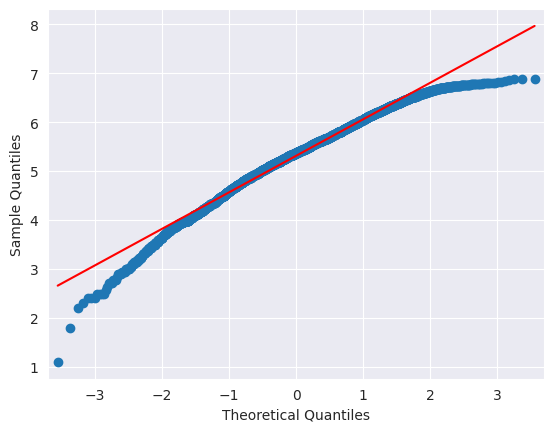

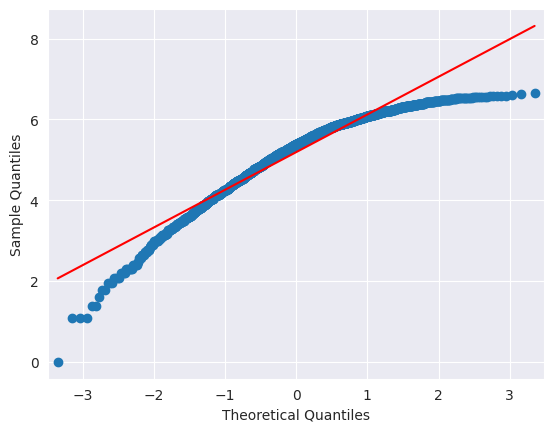

In [ ]:
qqplot(log_weekdays, line="s")
qqplot(log_weekends, line="s")

Even after applying log transformation, we don't get normal distribution of the data .
- The plot shows that it is now left skewed
- Shapiro test tells, it is not normally distributed
- In Q Q plot as well we can see outliers on left tail, also the distribution does not follow the expected line.

In [ ]:
t_stat, pvalue = ttest_ind(log_weekdays, log_weekends, alternative='two-sided')
t_stat, pvalue

(6.114715170631891, 1.014211424845789e-09)

**Reject the Null Hypothesis**: The p-value is lesser then significance level of 0.05, so we reject the null hypothesis in these cases.

The **Weekdays** and **Weekends** variables have **significant difference** in their **mean** of count of bike shared per day per hour.

This suggest that there is statistical difference in mean number of Yulu bike shared on Working days and weekends.

This implies that the demand **changes** based on working day.

## Q) Does number of Bikes rented change depending on different Weather condition?



In [ ]:
px.histogram(yulu_df, x='count', color='weather', marginal='box')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [ ]:
# Filter data w.r.t Weather
weather_1 = yulu_df[yulu_df['weather'] == 1]['count']
weather_2 = yulu_df[yulu_df['weather'] == 2]['count']
weather_3 = yulu_df[yulu_df['weather'] == 3]['count']
weather_4 = yulu_df[yulu_df['weather'] == 4]['count']
weather_4

4018    164
Name: count, dtype: int64

### Assumptions of ANOVA Test

1. **Independence of Observations**:
   - The samples must be independent of each other, meaning the data from one group should not influence the data from another group.

2. **Normality**:
   - The data in each group should be approximately normally distributed. This can be checked using statistical tests (e.g., Shapiro-Wilk test) or visually using Q-Q plots.

3. **Homogeneity of Variances (Homoscedasticity)**:
   - The variance among the groups should be approximately equal. This assumption can be tested using Levene's test or Bartlett's test.

Assuming the data values obtained are independent of each other


Removing weather 4 value columns, as there is only one data point. This can't be used for statistical analysis

In [ ]:
# Check normality
# H0: Dataset sample follows normal distribution
# Ha: Dataset sample does not follows normal distribution

print(shapiro(weather_1))
print(shapiro(weather_2))
print(shapiro(weather_3))

ShapiroResult(statistic=0.9263750393975745, pvalue=1.2685735307432593e-44)
ShapiroResult(statistic=0.912944431410768, pvalue=2.120129755804795e-32)
ShapiroResult(statistic=0.8069116700225586, pvalue=1.4816571285612324e-26)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5128.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test to assess the normality of a dataset:
We can see all three variables have, very low p_value, extremely small. Less than the significance level of 0.05.

We **reject** the **null hypothesis**.This suggests that the data in `weather_1`, `weather_2` and `weather_3` does **not** follow a **normal distribution**. This is seen is histogram and descriptive stats above as well.

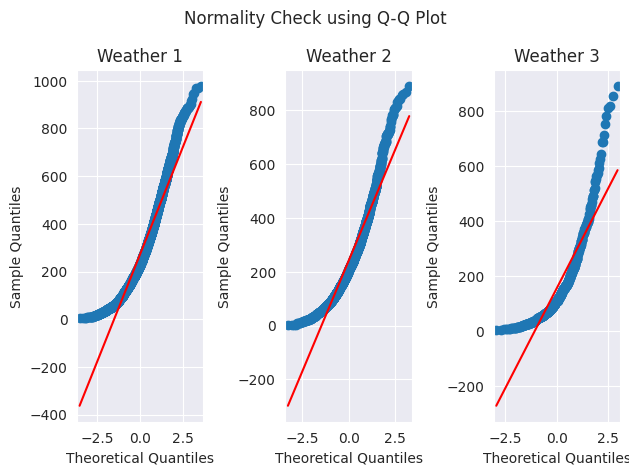

In [ ]:
# checking normal distribution
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

qqplot(weather_1.to_frame()['count'], line="s", ax=ax1)
qqplot(weather_2.to_frame()['count'], line="s", ax=ax2)
qqplot(weather_3.to_frame()['count'], line="s", ax=ax3)

plt.suptitle('Normality Check using Q-Q Plot')
ax1.set_title("Weather 1")
ax2.set_title("Weather 2")
ax3.set_title("Weather 3")

plt.tight_layout()
plt.show()

Q-Q plot also shows that our data, weather variables are not normally distributed.
None of the three weather variables follow the expected Quantile line.

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal

levene_stat, p_value = levene(weather_1, weather_2, weather_3)
p_value

4.464695431462384e-16

**Test Result:**
- **p-value**: 4.46e-16

Since the p-value (4.46e-16) is much smaller than the significance level of 0.05, we reject the null hypothesis. This indicates that the variances of the `weather_1`, `weather_2`, `weather_3` the variance of each group is significantly different.

### Annova Test

**Null Hypothesis (H0):** The mean bike shares per hour are equal across all weather conditions.
$$
H_0: \mu_{weather\_1} = \mu_{weather\_2} = \mu_{weather\_3}
$$
The null hypothesis states that there is no significant difference in the mean number of bike shares per hour among the three weather conditions.

**Alternative Hypothesis (H1):** At least one of the mean bike shares per hour is different across the weather conditions.
$$
H_1: \text{At least one } \mu_{weather\_i} \text{ is different}
$$
The alternative hypothesis states that there is a significant difference in the mean number of bike shares per hour between at least two of the weather conditions.

Consider the significance level $\alpha = 0.05$.


In [ ]:
#H0: all means are same
#H1: aleast one diff
f_stat,p = f_oneway(weather_1,weather_2,weather_3)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 139.6974859198489, pval: 2.5067214601336117e-60


**One way ANOVA test**
- **F-statistic**: 139.70
- **p-value**: 2.51e-60

**Reject the Null Hypothesis:** Since the p-value (2.51e-60) is much smaller than the significance level of 0.05, we reject the null hypothesis.

This indicates that there is a **significant difference** in the **mean** number of bike shares per hour **among** the three **weather** **conditions**. In other words, at least one of the weather conditions has a mean bike share rate that is different from the others.


We will conduct the same test again to check which two weather conditions have significant difference in their mean count of bike share.

In [ ]:
f_stat,p = f_oneway(weather_1,weather_2)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 53.72939663986367, pval: 2.5544760357003924e-13


In [ ]:
f_stat,p = f_oneway(weather_1,weather_3)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 248.133724988633, pval: 9.150209559437962e-55


In [ ]:
f_stat,p = f_oneway(weather_2,weather_3)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 131.56998875906217, pval: 9.438822129513474e-30


### Conclusion of annova test on weather conditions

**ANOVA Test Results Between Weather Conditions**

1. **Weather_1 vs. Weather_2:**
   - **F-statistic**: 53.73
   - **p-value**: 2.55e-13

2. **Weather_1 vs. Weather_3:**
   - **F-statistic**: 248.13
   - **p-value**: 9.15e-55

3. **Weather_2 vs. Weather_3:**
   - **F-statistic**: 131.57
   - **p-value**: 9.44e-30

**Conclusion:**

For all pairs of weather conditions, the p-values are much smaller than the significance level of 0.05. This allows us to reject the null hypothesis in each case. Therefore, there is a significant difference in the mean number of bike shares per hour between each pair of weather conditions. Specifically:

- The mean bike shares per hour differ significantly between Weather_1 and Weather_2, between Weather_1 and Weather_3, and between Weather_2 and Weather_3.

We can't say much about weather condition 4 but, these results suggest that weather conditions have a significant impact on the mean number of bike shares per hour.

This suggest that one weather condition results in significantly higher or lower bike shares compared to others, this weather condition could be a key factor influencing bike usage patterns.

From the histogram above we can say that light weather condition are more favourable to customer to share a Yulu bike ride. The mean count of bike share increases as weather conditions are become less extreme. i.e. $$ \mu_{weather\_1} > \mu_{weather\_2} > \mu_{weather\_3} > \mu_{weather\_4} $$

## Q) Does number of Bikes rented change depending on seasons

In [ ]:
px.histogram(data_frame=yulu_df, x='count', color='season', marginal='box')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


as above weather feature this is also not normally distributed

### Check Assumption of Annova test

1. Assuming the data values obtained are independent of each other. The data is collected at each hour of the day. The count calculated is purely the number of Yulu bikes Shared and is not depend or infered from others.   

In [ ]:
# # Filter data w.r.t Season
season_1 = yulu_df[yulu_df['season'] == 1]['count']
season_2 = yulu_df[yulu_df['season'] == 2]['count']
season_3 = yulu_df[yulu_df['season'] == 3]['count']
season_4 = yulu_df[yulu_df['season'] == 4]['count']
season_1

0         3
1         8
2        14
3        36
4        56
       ... 
4835    549
4836    330
4837    223
4838    148
4839     54
Name: count, Length: 1933, dtype: int64

In [ ]:
# Check normality
# H0: Dataset sample follows normal distribution
# Ha: Dataset sample does not follows normal distribution

print(shapiro(season_1))
print(shapiro(season_2))
print(shapiro(season_3))
print(shapiro(season_4))

ShapiroResult(statistic=0.8393688270972782, pvalue=2.0130260129212693e-40)
ShapiroResult(statistic=0.9365907974483808, pvalue=5.510275515316597e-28)
ShapiroResult(statistic=0.9350196448633028, pvalue=2.775880666817389e-28)
ShapiroResult(statistic=0.9190705734282236, pvalue=4.995588234425689e-31)


Shapiro-Wilk test to assess the normality of a dataset:
We can see all four season variables have, very low p_value, extremely small. Less than the significance level of 0.05.

We **reject** the **null hypothesis**.This suggests that the data in `Season_1`, `Season_2`, `Season_3` and `Season_4` does **not** follow a **normal distribution**. This is seen is histogram and descriptive stats above as well.

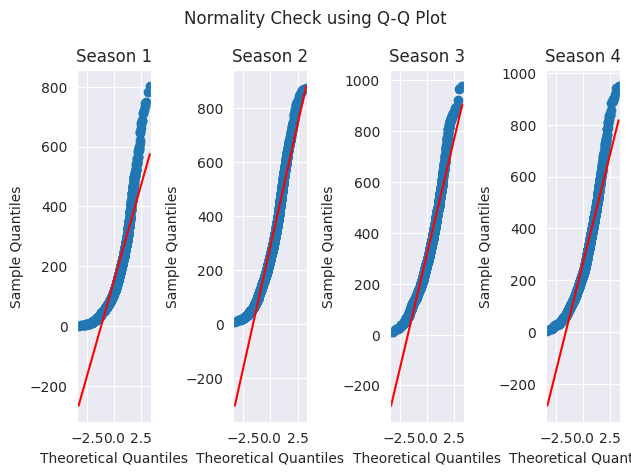

In [ ]:
# checking normal distribution
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

qqplot(season_1.to_frame()['count'], line="s", ax=ax1)
qqplot(season_2.to_frame()['count'], line="s", ax=ax2)
qqplot(season_3.to_frame()['count'], line="s", ax=ax3)
qqplot(season_4.to_frame()['count'], line="s", ax=ax4)

plt.suptitle('Normality Check using Q-Q Plot')
ax1.set_title("Season 1")
ax2.set_title("Season 2")
ax3.set_title("Season 3")
ax4.set_title("Season 4")

plt.tight_layout()
plt.show()

Q-Q plot also shows that our data, Season variables are not normally distributed. They are slightly devaiting from the normal distribution.

None of the four Season variables follow the expected Quantile line.

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal

levene_stat, p_value = levene(season_1, season_2, season_3, season_4)
p_value

2.4695992814667114e-52

**Test Result:**
- **p-value**: 2.46e-52

Since the p-value (2.46e-52) is much smaller than the significance level of 0.05, we reject the null hypothesis. This indicates that the variances of the `season_1`, `weather_2`, `weather_3` and `season_4` is significantly different.

### Annova Test
**Null Hypothesis (H0):** The mean bike shares per hour are equal across all seasons.
$$
H_0: \mu_{season\_1} = \mu_{season\_2} = \mu_{season\_3} = \mu_{season\_4}
$$
The null hypothesis states that there is no significant difference in the mean number of bike shares per hour among the four seasons.

**Alternative Hypothesis (H1):** At least one of the mean bike shares per hour is different across the seasons.
$$
H_1: \text{At least one } \mu_{season\_i} \text{ is different}
$$
The alternative hypothesis states that there is a significant difference in the mean number of bike shares per hour between at least two of the seasons.

Consider the significance level $\alpha = 0.05$.


In [ ]:
#H0: all means are same
#H1: aleast one diff

f_stat,p = f_oneway(season_1,season_2,season_3,season_4)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 347.9559400206479, pval: 5.530474939078762e-212


**One way ANOVA test**
- **F-statistic**: 347.96
- **p-value**: 5.53e-212

**Reject the Null Hypothesis:** Since the p-value (5.53e-212) is much smaller than the significance level of 0.05, we reject the null hypothesis.

This indicates that there is a **significant difference** in the **mean** number of bike shares per hour **among** the four **seasons**. In other words, at least one of the seasons has a mean bike share rate that is different from the others.

> Check with pairs of varaibles

In [ ]:
f_stat,p = f_oneway(season_2,season_3, season_4)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 33.63013763694511, pval: 3.009513171901075e-15


In [ ]:
f_stat,p = f_oneway(season_1, season_2)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 722.1775530843698, pval: 5.330246524821335e-146


In [ ]:
f_stat,p = f_oneway(season_1, season_3)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 991.5037640670921, pval: 5.993334942303749e-194


In [ ]:
f_stat,p = f_oneway(season_1, season_4)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 546.1329416104628, pval: 4.2377455147089877e-113


In [ ]:
f_stat,p = f_oneway(season_2, season_3)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 16.55217448371286, pval: 4.827223233721991e-05


In [ ]:
f_stat,p = f_oneway(season_2, season_4)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 16.72989754074152, pval: 4.397242253553293e-05


In [ ]:
f_stat,p = f_oneway(season_3, season_4)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 68.74129595656864, pval: 1.5308328956045944e-16


### Conclusion of annova test on Seasons variable

We conducted paired one-way ANOVA tests as well for all possible combinations of seasons, and saw that p-values are less than the significance level of 0.05 in every case.

**Conclusion:**

Since all p-values are smaller than the significance level, we reject the null hypothesis for each paired comparison. This indicates that there is a **significant difference** in the **mean** number of bike shares per hour **between** each pair of seasons. In other words, the mean bike share rate for every season differs significantly from that of the others.

This suggest that one Season condition results in significantly higher or lower bike shares compared to others, this Season condition could be a key factor influencing bike usage patterns.

From the histogram above we can say that the mean count of bike share increases in the order below: $$ \mu_{season\_3} > \mu_{season\_2} > \mu_{season\_4} > \mu_{season\_1} $$

The mean bike share count is highest in the fall (Season 3) and Summer (Season 2). This could be due to favorable weather conditions, longer daylight hours, and possibly more outdoor activities that encourage biking.

The mean bike share count is lowest in winter (Season 4) and Spring (Season 1). This could be due to colder temperatures, shorter days, and potentially less favorable weather conditions in these seasons might discourage biking.

## Q) Are Weather and Season dependent on each other

Chi-square test to check if Weather is dependent on the season (10 points)

In [ ]:
c_tab = pd.crosstab(yulu_df['weather'], yulu_df['season'])
c_tab

season      1     2     3     4
weather                        
1        1293  1276  1354  1205
2         500   508   434   556
3         139   154   150   177
4           1     0     0     0

### Assumptions of the Chi-Square Test

1. **Independence of Observations:**
   - Each observation in the dataset should be independent of the others. This means that the data should come from a random sample, and the categories should not overlap.

2. **Expected Frequency:**
   - The expected frequency for each category should be at least 5. If any of the expected frequencies are below 5, the Chi-Square test might not be valid, and a different test (like Fisher’s Exact Test) might be considered.

3. **Categorical Data:**
   - The data should be in the form of counts or frequencies for different categories. The Chi-Square test is not suitable for continuous data unless it is first converted into categorical data.

4. **Large Sample Size:**
   - The Chi-Square test assumes a sufficiently large sample size to ensure the validity of the test. Small sample sizes might lead to inaccurate results.


**Removing weather 4** related values as it only has one data point. Hence is the frequency of this variable is **less** than the 5, which is the least **expected frequency** for chi square test. Therefore we will drop this variable.   

In [ ]:
# removing 4th row
c_tab.drop(index=4, inplace=True)
c_tab

season      1     2     3     4
weather                        
1        1293  1276  1354  1205
2         500   508   434   556
3         139   154   150   177

### Chi-Square Test

**Null Hypothesis (H0):** There is no association between weather and season; the distribution of weather types is independent of the season.
$$
H_0: \text{Weather and season are independent.}
$$
The null hypothesis states that the distribution of weather types does not vary across different seasons, implying no significant association between weather and season.

**Alternative Hypothesis (H1):** There is an association between weather and season; the distribution of weather types depends on the season.
$$
H_1: \text{Weather and season are not independent.}
$$
The alternative hypothesis states that the distribution of weather types varies across different seasons, implying a significant association between weather and season.

Consider the significance level $\alpha = 0.05$.

In [ ]:
chi_stat, p, df, exp_freq  = chi2_contingency(c_tab)
print("chi_stat:",chi_stat)
print("p_value:",p)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 28.827131691888443
p_value: 6.55946332906809e-05
df: 6
exp_freq: [[1279.02091402 1282.99302866 1282.99302866 1282.99302866]
 [ 498.33927188  499.88690937  499.88690937  499.88690937]
 [ 154.6398141   155.12006197  155.12006197  155.12006197]]


**Chi-Square Test**
- **Chi-Square Statistic**: 28.83
- **p-value**: 6.56e-05
- **Degrees of Freedom (df)**: 6

**Reject the Null Hypothesis:** Since the p-value (6.56e-05) is much smaller than the significance level of 0.05, we reject the null hypothesis.

This indicates that there is a **significant association** between **weather** and **season**. In other words, the distribution of weather types depends on the season.



### Conclusion of Chi Square test on dependability of Season and Weather

**Naturally** the distribution of weather types varies with the season.

This implies that **different** types of **weather** are more likely to occur in **specific seasons**, which in turn **affects** the number of Yulu bike shares per hour.

## Future Work:
1) Time series analysis on the `count` variable with respect to different datetime attributes, e.g., daily bike share trends for a week.

2) Predicting bike share count on specific **date, time, week, or month**.


### NBconvert
To solve metadata and state error

In [ ]:
!pip install nbconvert

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

# Use the correct path
notebook_path = "/content/drive/MyDrive/Colab Notebooks/Scaler/Yulu_Hyp_test.ipynb"
clean_notebook_path = "/content/drive/MyDrive/Colab Notebooks/Scaler/Yulu_Hyp_test_clean.ipynb"

print(f"Processing notebook: {notebook_path}")

# Load the notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = json.load(f)

# Check if widgets exists in metadata
if 'widgets' in notebook.get('metadata', {}):
    print("Found widgets in metadata, removing...")
    del notebook['metadata']['widgets']
    print("Widgets section removed.")
else:
    print("No widgets section found in metadata.")

# Save the cleaned notebook
with open(notebook_path, 'w', encoding='utf-8') as f:
    json.dump(notebook, f, indent=1)

print("Notebook cleaned and saved.")